In [15]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Target'] = pd.Series(data.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


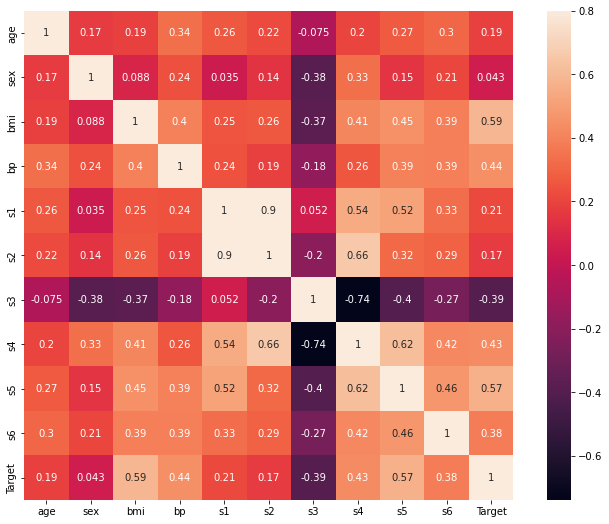

In [6]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True, vmax=.8, square=True);

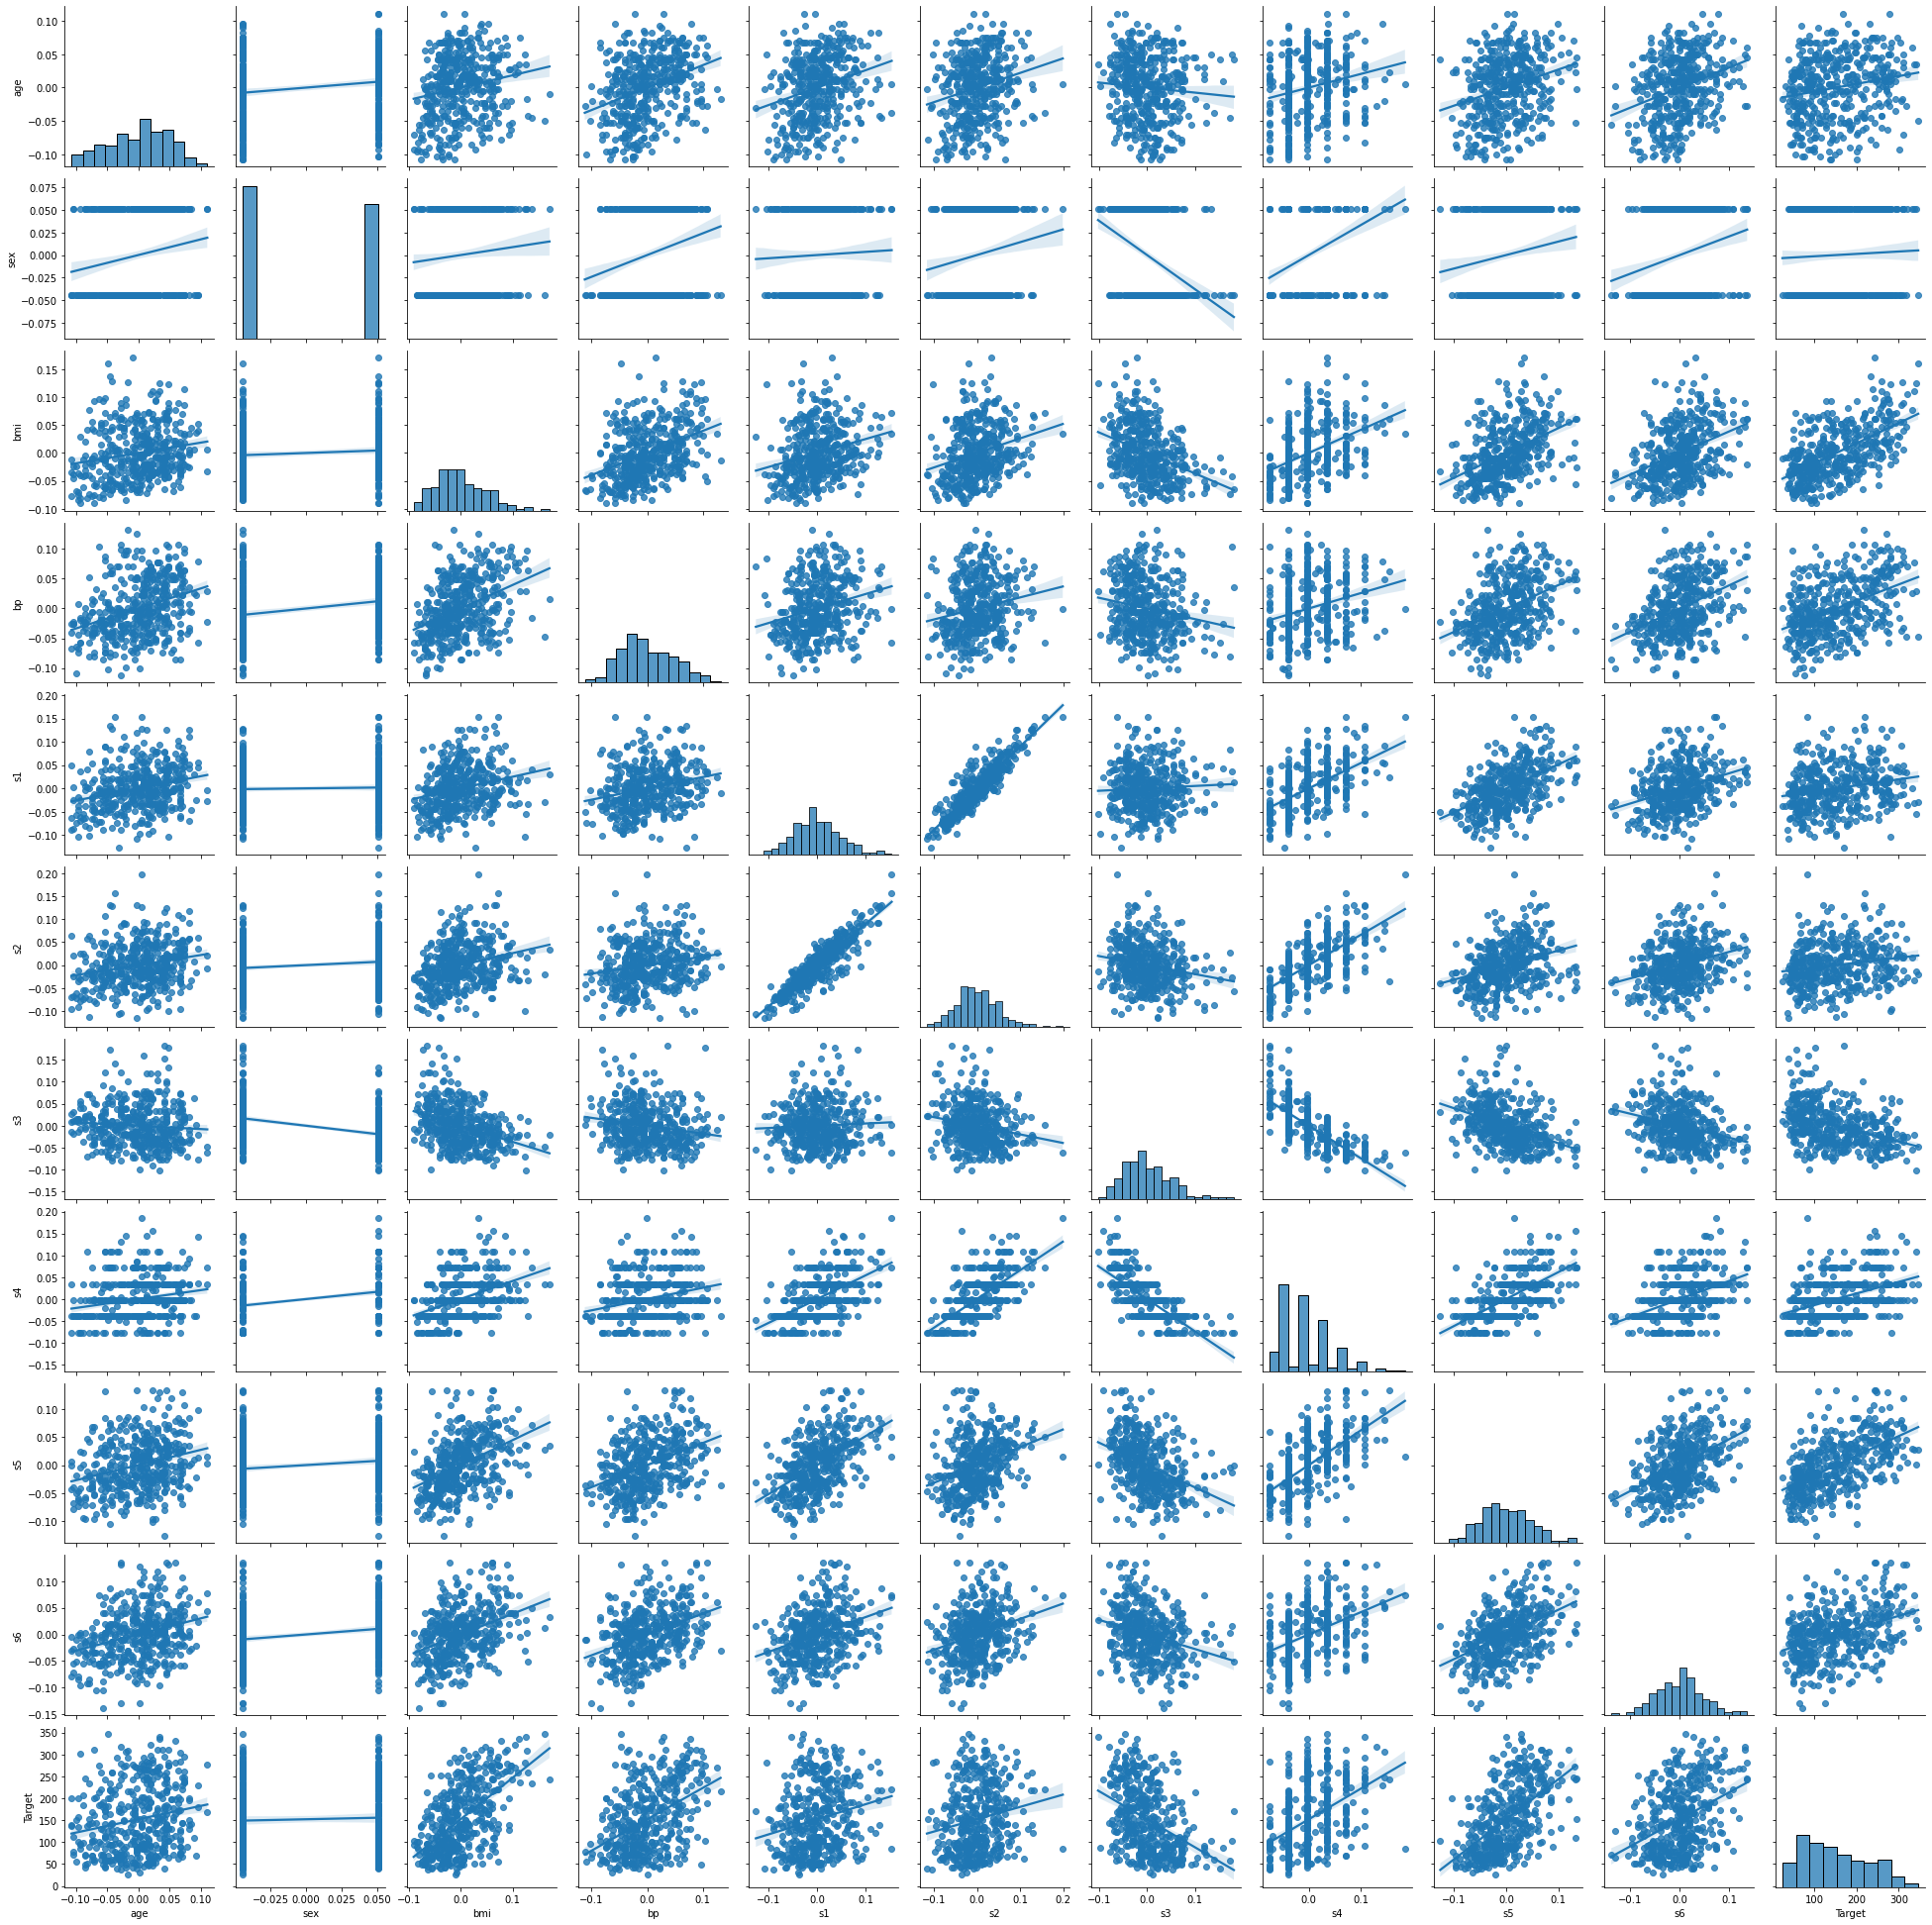

In [7]:
sns.pairplot(df,kind="reg")

In [8]:
y = df['Target']
X = df.drop(columns = ['Target'],axis = 1)

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
linear=LinearRegression()
linear.fit(X_train,y_train)
pred=linear.predict(X_test)
print("Intercept | Constant of Linear Regression Equation: ",linear.intercept_)
print("--------------------------------------------------------------------------------------")
print("Coefficient of Linear Regression Equation: ",linear.coef_)

Intercept | Constant of Linear Regression Equation:  151.3456553477407
--------------------------------------------------------------------------------------
Coefficient of Linear Regression Equation:  [  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]


In [16]:
# TRAIN & TEST ERRORS
print("Train Error: ",np.sqrt(mean_squared_error(y_train,linear.predict(X_train))))
print("Test Error: ",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))

Train Error:  53.55881425327268
Test Error:  53.8532569849144


In [17]:
from sklearn.metrics import r2_score,mean_squared_error
print("R^2 Score: ",r2_score(y_test,pred))
print("--------------------------------------------------------------------------------------")
print("Mean Squared Error: ", mean_squared_error(y_test,pred))
print("--------------------------------------------------------------------------------------")
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))

R^2 Score:  0.45260660216173787
--------------------------------------------------------------------------------------
Mean Squared Error:  2900.1732878832318
--------------------------------------------------------------------------------------
Root Mean Squared Error:  53.8532569849144


In [18]:
linear.predict(X)[0:10]
y[0:10]
compare_results=pd.DataFrame({"true_y":y[0:10],
                             "predict_y":linear.predict(X)[0:10]})
compare_results

,true_y,predict_y
0,151.0,210.742441
1,75.0,69.437938
2,141.0,184.060748
3,206.0,161.134783
4,135.0,129.429928
5,97.0,103.693833
6,138.0,71.785651
7,63.0,118.035069
8,110.0,160.537678
9,310.0,207.350024


# NONLINEAR - GAUSSIAN KERNEL (SVR)

In [24]:
from sklearn.svm import SVR
svr=SVR(kernel="sigmoid").fit(X_train,y_train)
pred=svr.predict(X_test)
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))
print("--------------------------------------------------------------------------------------")
print("R^2 Score: ",r2_score(y_test,pred))

Root Mean Squared Error:  57.94876867012697
--------------------------------------------------------------------------------------
R^2 Score:  0.3661827841522107


In [25]:
compare_results=pd.DataFrame({"true_y":y[0:10],
                             "predict_y":svr.predict(X)[0:10]})
compare_results

,true_y,predict_y
0,151.0,168.508391
1,75.0,95.293337
2,141.0,155.371928
3,206.0,144.523877
4,135.0,127.209359
5,97.0,102.599747
6,138.0,102.896183
7,63.0,148.134292
8,110.0,150.697244
9,310.0,161.636496


# NONLINEAR Polynomial Parameter

In [26]:
from sklearn.svm import SVR
svr=SVR(kernel="poly").fit(X_train,y_train)
pred=svr.predict(X_test)
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))
print("--------------------------------------------------------------------------------------")
print("R^2 Score: ",r2_score(y_test,pred))

Root Mean Squared Error:  61.66866889089265
--------------------------------------------------------------------------------------
R^2 Score:  0.2821978487423774


In [27]:
compare_results=pd.DataFrame({"true_y":y[0:10],
                             "predict_y":svr.predict(X)[0:10]})
compare_results

,true_y,predict_y
0,151.0,148.905401
1,75.0,103.132188
2,141.0,144.565615
3,206.0,142.966745
4,135.0,139.532819
5,97.0,102.353873
6,138.0,122.851854
7,63.0,132.940758
8,110.0,142.967336
9,310.0,144.968594


# NONLINEAR linear Parameter

In [28]:
from sklearn.svm import SVR
svr=SVR(kernel="linear").fit(X_train,y_train)
pred=svr.predict(X_test)
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))
print("--------------------------------------------------------------------------------------")
print("R^2 Score: ",r2_score(y_test,pred))

Root Mean Squared Error:  72.04434254976438
--------------------------------------------------------------------------------------
R^2 Score:  0.02034000915866252


In [29]:
compare_results=pd.DataFrame({"true_y":y[0:10],
                             "predict_y":svr.predict(X)[0:10]})
compare_results

,true_y,predict_y
0,151.0,142.174030
1,75.0,139.213466
2,141.0,141.754232
3,206.0,141.495906
4,135.0,140.810323
5,97.0,139.014246
6,138.0,139.746218
7,63.0,142.055251
8,110.0,141.757066
9,310.0,141.841410


### Results

After calculating all our values, we got a result like 0.45 as a result of linear regression. When we tried the Gaussian kernel, we got a result like 0.36. When we tried the Polynomial parameter, we got a result like 0.28. Against these results, linear regression gave us the best value and then Gaussian kernel.